In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import ndimage
import random
import matplotlib.pyplot as plt
print('everything is imported')
data_path = './data/orl_faces/s'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


everything is imported


In [2]:
#Importing the dataset
def load_images(different_faces):
    image = ndimage.imread(data_path+str(1)+'/'+str(1)+'.pgm', flatten=True)
    image = np.reshape(image,[1,92*112])
    images_train= []
    images_test = []
    for i in range(different_faces):
        for j in range(10):
            if j>6:
                image = ndimage.imread(data_path+str(i+1)+'/'+str(j+1)+'.pgm', flatten=True)
                image = np.reshape(image,[92*112])
                images_test.append(image)
            else:
                image = ndimage.imread(data_path+str(i+1)+'/'+str(j+1)+'.pgm', flatten=True)
                image = np.reshape(image,[92*112])
                images_train.append(image)
    return images_train, images_test
train, test = load_images(5)
print(len(train))
print("got the data")

35
got the data


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
learning_rate = 0.001
#Auto Encoder Graph (5 couches divisiées en 2X1X2)
auto_x = tf.placeholder(tf.float32, [None, 92*112])
auto_y = tf.placeholder(tf.float32, [None, 92*112])

n_neurons_1 = 128
n_neurons_2 = 64
n_out = 92*112
n_neurons_inter = 32
#Encoder
w_hidden_1 = tf.Variable(tf.zeros([92*112, n_neurons_1]))
b_hidden_1 =  tf.Variable(tf.zeros([n_neurons_1]))
w_hidden_2 = tf.Variable(tf.zeros([n_neurons_1, n_neurons_2]))
b_hidden_2 =  tf.Variable(tf.zeros([n_neurons_2]))
w_hidden_3 = tf.Variable(tf.zeros([n_neurons_2, n_neurons_inter]))
b_hidden_3 =  tf.Variable(tf.zeros([n_neurons_inter]))
#inter
w_hidden_inter = tf.Variable(tf.zeros([n_neurons_inter, n_neurons_2]))
b_hidden_inter =  tf.Variable(tf.zeros([n_neurons_2]))
#Decoder
w_hidden_4 = tf.Variable(tf.zeros([n_neurons_2, n_neurons_1]))
b_hidden_4 =  tf.Variable(tf.zeros([n_neurons_1]))
w_out= tf.Variable(tf.zeros([n_neurons_1, n_out]))
b_out =  tf.Variable(tf.zeros([n_out]))

#Encoder
hidden_1 =  tf.nn.sigmoid(tf.add(tf.matmul(auto_x, w_hidden_1),b_hidden_1))
hidden_2 =  tf.nn.sigmoid(tf.add(tf.matmul(hidden_1, w_hidden_2),b_hidden_2))
hidden_3 =  tf.nn.sigmoid(tf.add(tf.matmul(hidden_2, w_hidden_3),b_hidden_3))
#Inter
inter =  tf.nn.sigmoid(tf.add(tf.matmul(hidden_3, w_hidden_inter),b_hidden_inter))
#Decoder
hidden_4 =  tf.nn.sigmoid(tf.add(tf.matmul(inter, w_hidden_4),b_hidden_4))
out =  tf.add(tf.matmul(hidden_4, w_out),b_out)

#Loss
loss_auto = tf.reduce_sum(tf.losses.mean_squared_error(labels = auto_y, predictions = out))
#Optimizer
opt_auto = tf.train.AdamOptimizer(learning_rate).minimize(loss_auto)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:0 Loss= 17306.602
Epoch:1000 Loss= 2443.979
Epoch:2000 Loss= 1174.8602
done


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


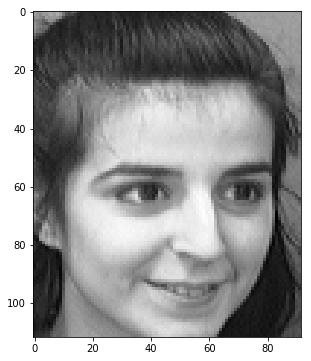

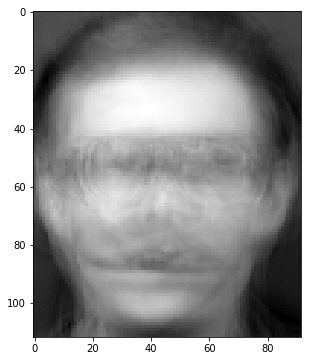

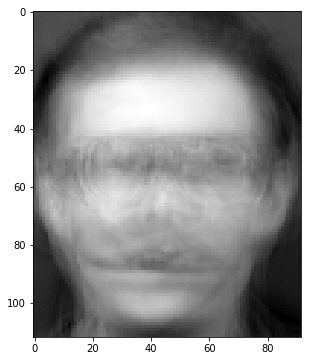

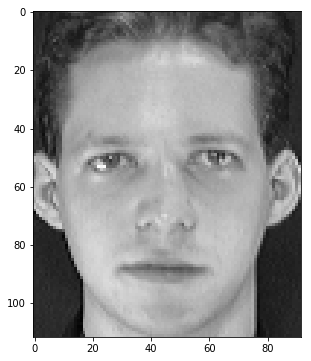

In [4]:
#Train autoencoder
epochs = 3000
display_steps = 1000
random_index = random.randint(0,len(train)-30)
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        _, loss = sess.run([opt_auto, loss_auto], feed_dict={auto_x: train[random_index:random_index+30], auto_y:train[random_index:random_index+30]})
        if i % display_steps ==0:
            loss = sess.run(loss_auto, feed_dict={auto_x: train, auto_y:train})
            print("Epoch:"+str(i)+" Loss= "+str(loss))
    
    image_1 = ndimage.imread(data_path+str(10)+'/'+str(4)+'.pgm', flatten=True)
    image_generated = np.reshape(out.eval({auto_x:[train[0]]}), [112,92])
    image_generated_1 = np.reshape(out.eval({auto_x:[np.reshape(image_1,[92*112])]}), [112,92])
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(image_1, cmap="gray")
    print("done")
    plt.show()
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(image_generated_1, cmap="gray")
    plt.show()
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(image_generated, cmap="gray")
    plt.show()
    image_1 = np.reshape(train[0], [112,92])
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.imshow(image_1, cmap="gray")
    plt.show()
    